## Zero Initialization Practical with Sigmoid

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

2024-09-04 09:24:22.784992: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-04 09:24:22.790650: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-04 09:24:22.809695: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-04 09:24:22.840997: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-04 09:24:22.850345: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-04 09:24:22.873097: I tensorflow/core/platform/cpu_feature_gu

### Importing Data

In [3]:
df = pd.read_csv('1.ushape.csv')

In [4]:
# pip install tensorflow

In [5]:
df.head()

,X,Y,Class
0,0.031595,0.986988,0.0
1,2.115098,-0.046200,1.0
2,0.882490,-0.075800,0.0
3,-0.055100,-0.037300,1.0
4,0.829545,-0.539000,1.0


### Ploting data

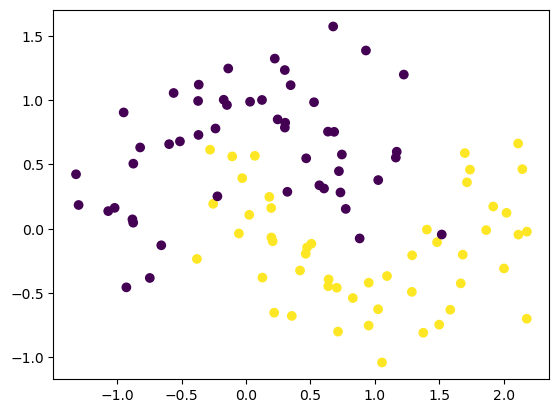

In [6]:
plt.scatter(df['X'],df['Y'],c=df['Class'])

### Independent & Dependent Features

In [7]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

### Model Creation

In [8]:
model = Sequential()

model.add(Dense(2,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

### Default Weights Assign by Keras

In [9]:
model.get_weights()

[array([[1.0423104 , 1.2080537 ],
        [0.5028305 , 0.34058177]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.7720787],
        [ 1.1416172]], dtype=float32),
 array([0.], dtype=float32)]

In [10]:
# Assiging the weights to varible
initial_weights = model.get_weights()

### Assigning all Weights to Zero 

In [11]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)*0.5
initial_weights[1] = np.zeros(model.get_weights()[1].shape)*0.5
initial_weights[2] = np.zeros(model.get_weights()[2].shape)*0.5
initial_weights[3] = np.zeros(model.get_weights()[3].shape)*0.5

In [12]:
initial_weights

[array([[0., 0.],
        [0., 0.]]),
 array([0., 0.]),
 array([[0.],
        [0.]]),
 array([0.])]

### Assigning Zero weight to model

In [13]:
model.set_weights(initial_weights)

In [14]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

### Model Compiling

In [15]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

### Model Training

In [16]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4961 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5117 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5391 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4883 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4922 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4922 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5273 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss

In [17]:
model.get_weights()

[array([[-0.47247028, -0.47247028],
        [ 0.49855405,  0.49855405]], dtype=float32),
 array([-0.02252849, -0.02252849], dtype=float32),
 array([[-0.11031574],
        [-0.11031574]], dtype=float32),
 array([0.02484173], dtype=float32)]

In [18]:
# pip install mlxtend

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 8s 860us/step


<AxesSubplot: >

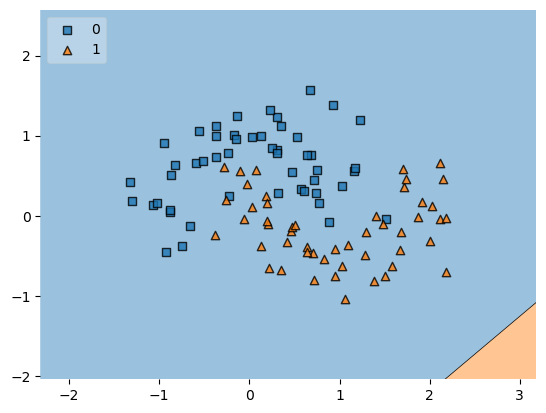

In [19]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)